In [1]:
## Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки отображения
sns.set_style("whitegrid")

In [2]:
## Загрузка данных
file_path = "/content/drive/MyDrive/Доставка товаров.xlsx"
xls = pd.ExcelFile(file_path)

df_orders = pd.read_excel(xls, sheet_name="fact_orders")
df_supplier = pd.read_excel(xls, sheet_name="Поставщик")
df_customer = pd.read_excel(xls, sheet_name="Покупатель")
df_product = pd.read_excel(xls, sheet_name="Продукт")
df_warehouse = pd.read_excel(xls, sheet_name="Склад")
df_calendar = pd.read_excel(xls, sheet_name="Календарь")

##Ознакомление с данными, изучение количества пропусков в них - null значений и выяснение причин их возникновения.

In [3]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order_ID            100000 non-null  int64         
 1   Order_Date          100000 non-null  datetime64[ns]
 2   Customer_ID         100000 non-null  object        
 3   Product_ID          100000 non-null  object        
 4   Warehouse_ID        100000 non-null  object        
 5   Supplier_ID         100000 non-null  object        
 6   Order_Status        100000 non-null  object        
 7   Quantity            100000 non-null  int64         
 8   Order_Amount        100000 non-null  int64         
 9   Delivery_Time_Days  94956 non-null   float64       
 10  Is_Delayed          100000 non-null  int64         
 11  Причина_Задержки    19794 non-null   object        
 12  Оценка_Доставки     80743 non-null   float64       
 13  Отзыв               80743 non-

In [4]:
df_orders.describe()

,Order_ID,Order_Date,Quantity,Order_Amount,Delivery_Time_Days,Is_Delayed,Оценка_Доставки
count,1.000000e+05,100000,100000.000000,100000.000000,94956.000000,100000.000000,80743.000000
mean,1.050000e+06,2023-12-30 22:12:54.432000,250.176240,68606.975270,7.087156,0.197940,4.002849
min,1.000001e+06,2023-01-01 00:00:00,1.000000,51.000000,3.000000,0.000000,1.000000
25%,1.025001e+06,2023-07-02 00:00:00,126.000000,24400.000000,4.000000,0.000000,4.000000
50%,1.050000e+06,2023-12-31 00:00:00,251.000000,54360.000000,6.000000,0.000000,4.000000
75%,1.075000e+06,2024-07-01 00:00:00,375.000000,102144.000000,7.000000,0.000000,5.000000
max,1.100000e+06,2024-12-30 00:00:00,499.000000,249001.000000,19.000000,1.000000,5.000000
std,2.886766e+04,NaN,144.119619,54428.767464,4.408113,0.398449,1.131215


In [5]:
df_orders["Order_Status"].value_counts()

,count
Order_Status,
Completed,75162
Completed with Delay,19794
Cancelled,5044


In [6]:
 df_orders["Is_Delayed"].value_counts()

,count
Is_Delayed,
0,80206
1,19794


In [7]:
df_orders["Оценка_Доставки"].value_counts()

,count
Оценка_Доставки,
5.0,31976
4.0,31894
3.0,6927
2.0,5019
1.0,4927


In [8]:
df_orders[df_orders["Оценка_Доставки"].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 19257 entries, 1 to 99997
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Order_ID            19257 non-null  int64         
 1   Order_Date          19257 non-null  datetime64[ns]
 2   Customer_ID         19257 non-null  object        
 3   Product_ID          19257 non-null  object        
 4   Warehouse_ID        19257 non-null  object        
 5   Supplier_ID         19257 non-null  object        
 6   Order_Status        19257 non-null  object        
 7   Quantity            19257 non-null  int64         
 8   Order_Amount        19257 non-null  int64         
 9   Delivery_Time_Days  14213 non-null  float64       
 10  Is_Delayed          19257 non-null  int64         
 11  Причина_Задержки    2921 non-null   object        
 12  Оценка_Доставки     0 non-null      float64       
 13  Отзыв               0 non-null      object        


In [9]:
df_supplier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Supplier_ID    50 non-null     object
 1   Supplier_Name  50 non-null     object
 2   Country        50 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [10]:
df_supplier.describe()

,Supplier_ID,Supplier_Name,Country
count,50,50,50
unique,50,50,4
top,S001,Поставщик 1,Германия
freq,1,1,18


In [11]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer_ID    10000 non-null  object
 1   Customer_Name  10000 non-null  object
 2   Segment        10000 non-null  object
dtypes: object(3)
memory usage: 234.5+ KB


In [12]:
df_customer.describe()

,Customer_ID,Customer_Name,Segment
count,10000,10000,10000
unique,10000,10000,3
top,C09984,Клиент 9984,B2C
freq,1,1,3396


In [13]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product_ID    100 non-null    object
 1   Product_Name  100 non-null    object
 2   Category      100 non-null    object
 3   Base_Price    100 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 3.3+ KB


In [14]:
df_product.describe()

,Base_Price
count,100.000000
mean,1003.160000
std,578.639343
min,54.000000
25%,404.000000
50%,1096.000000
75%,1518.250000
max,1986.000000


In [15]:
df_warehouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Warehouse_ID    20 non-null     object
 1   Warehouse_Name  20 non-null     object
 2   Region          20 non-null     object
 3   Capacity        20 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 772.0+ bytes


In [16]:
df_warehouse.describe()

,Capacity
count,20.00000
mean,136485.05000
std,38063.57623
min,76905.00000
25%,102086.75000
50%,147482.00000
75%,169258.00000
max,196019.00000


В целом с данные достаточно качественные для выполнения анализа и поиска ответов на вопросы. Пропуски имеющиеся в некоторых столбцах легко объяснимы, например в столбце описывающей кол-во дней доставки имеется 5044 пропущенных значений, что соответствует количеству отменненых заказов. Так же обнаружено, что не все ячейки с оценкой доставки заполнены - 19257 пропусков, и если из них 5044 просто отменены, то у оставшихся 14213 беглым анализом объяснить причину не удалось, нужно уточнить у заказчика анализа.


In [17]:
## Объединяем данные для удобства анализа
df = df_orders.merge(df_supplier, on="Supplier_ID", how="left")
df = df.merge(df_product, on="Product_ID", how="left")
df = df.merge(df_warehouse, on="Warehouse_ID", how="left")
df = df.merge(df_customer, on="Customer_ID", how="left")

# 1. Какой склад чаще всего сталкивается с задержками поставок и в чем причина?

In [18]:
# Сколько всего задержек? почти 20%
df["Is_Delayed"].value_counts()

,count
Is_Delayed,
0,80206
1,19794


In [19]:
# Выводим топ 5 складов, имеющие наибольшее количество задержек в отсортированном ввиде (по любым причинам).
delayed_orders = df[df["Is_Delayed"] == 1].value_counts("Warehouse_Name")
delayed_orders.head()

,count
Warehouse_Name,
Склад 10,1031
Склад 8,1028
Склад 1,1025
Склад 16,1021
Склад 7,1014


In [20]:
# топ 5 складов, имеющие наибольшее количество заказов
total_orders = df["Warehouse_Name"].value_counts()
total_orders.head()

,count
Warehouse_Name,
Склад 8,5155
Склад 5,5097
Склад 19,5055
Склад 6,5041
Склад 13,5041


In [21]:
# Выводим топ 5 складов, имеющие наибольшее количество задержек в процентном соотношении
df_sorted_delays = (delayed_orders * 100 / total_orders).sort_values(ascending=False)
df_sorted_delays.head()

,count
Warehouse_Name,
Склад 10,20.908538
Склад 7,20.588832
Склад 1,20.467252
Склад 16,20.452724
Склад 18,20.204655


In [22]:
# Сделаем таблицу по складам с общим числом заказов, количеством задержек по ним и % задержек. Выведем топ 5 отсортированных по % задержек.
df_order_performance = pd.DataFrame({
    "Total Orders": total_orders,
    "Delayed Orders": delayed_orders,
    #"Delay Rate (%)": df_sorted_delays
}).reset_index()

df_order_performance["Delay Rate (%)"] = (df_order_performance["Delayed Orders"] / df_order_performance["Total Orders"]) * 100

# Сортируем склады по убыванию доли задержек
df_order_performance = df_order_performance.sort_values("Delay Rate (%)", ascending=False)

# Выводим результат
df_order_performance.head()

,Warehouse_Name,Total Orders,Delayed Orders,Delay Rate (%)
1,Склад 10,4931,1031,20.908538
17,Склад 7,4925,1014,20.588832
0,Склад 1,5008,1025,20.467252
7,Склад 16,4992,1021,20.452724
9,Склад 18,4984,1007,20.204655


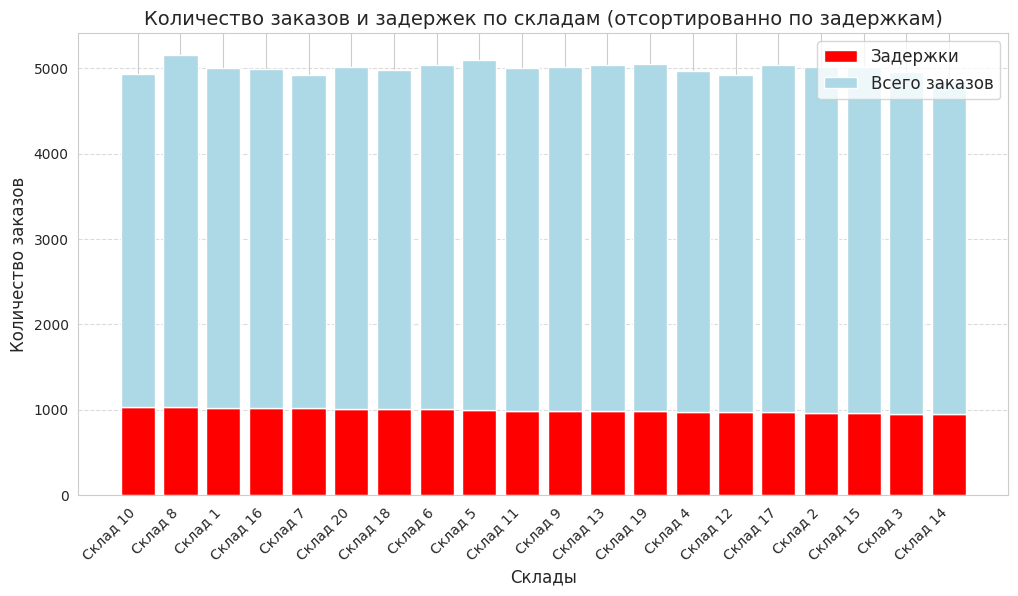

In [23]:
# Объединяем данные для графика
df_plot = pd.DataFrame({"Delayed Orders": delayed_orders, "Total Orders": total_orders})

# Сортируем склады по общему числу заказов
df_plot = df_plot.sort_values("Delayed Orders", ascending=False)

# Создаем график
plt.figure(figsize=(12, 6))

# Столбцы с задержками (внизу)
plt.bar(df_plot.index, df_plot["Delayed Orders"], color="red", label="Задержки")

# Столбцы с общим числом заказов
plt.bar(df_plot.index, df_plot["Total Orders"] - df_plot["Delayed Orders"],
        bottom=df_plot["Delayed Orders"], color="lightblue", label="Всего заказов")

# Настройки графика
plt.title("Количество заказов и задержек по складам (отсортированно по задержкам)", fontsize=14)
plt.xlabel("Склады", fontsize=12)
plt.ylabel("Количество заказов", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Отображаем график
plt.show()

<ipython-input-24-4788f30c8503>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-24-4788f30c8503>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


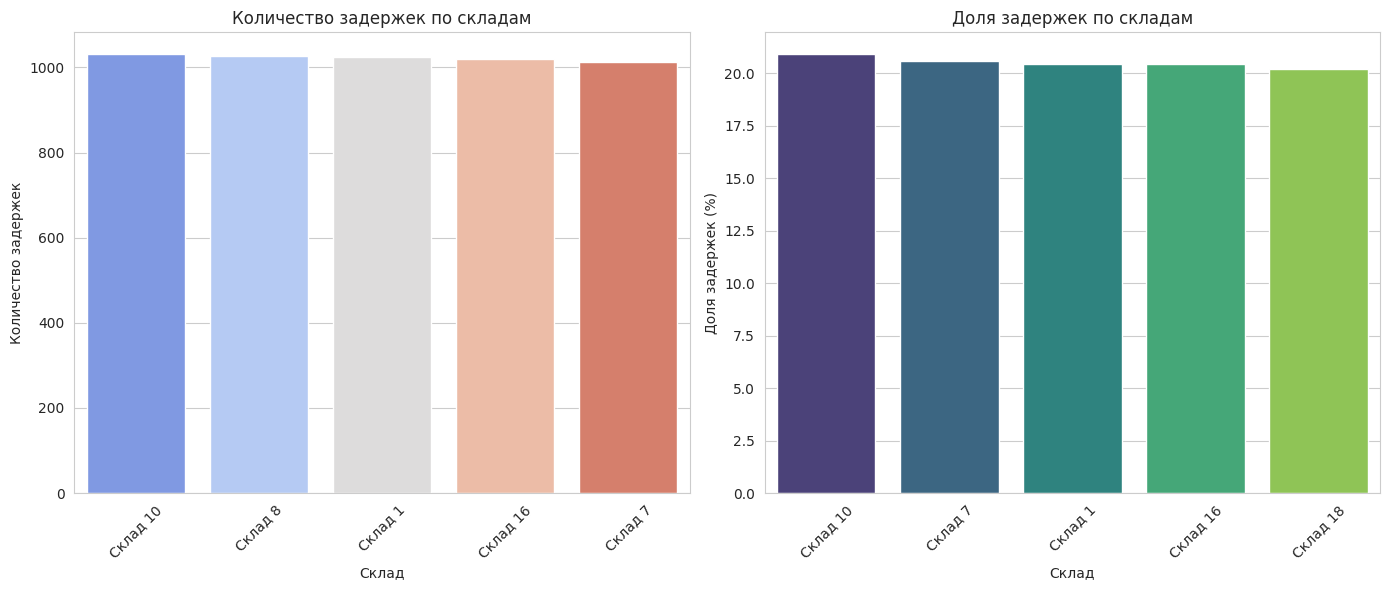

In [24]:
df_sorted_delays = df_order_performance.sort_values("Delay Rate (%)", ascending=False).head()
df_sorted_orders = df_order_performance.sort_values("Delayed Orders", ascending=False).head()

# Создаем фигуру с двумя графиками (1 строка, 2 столбца)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#  Первый график — распределение задержек по складам
sns.barplot(
    x=df_sorted_orders["Warehouse_Name"],
    y=df_sorted_orders["Delayed Orders"],
    ax=axes[0],  # Указываем первый график (левый)
    palette="coolwarm"
)
axes[0].set_title("Количество задержек по складам")
axes[0].set_xlabel("Склад")
axes[0].set_ylabel("Количество задержек")
axes[0].tick_params(axis="x", rotation=45)

#  Второй график — общее количество заказов по складам
sns.barplot(
    x=df_sorted_delays["Warehouse_Name"],
    y=df_sorted_delays["Delay Rate (%)"],
    ax=axes[1],  # Указываем второй график (правый)
    palette="viridis"
)
axes[1].set_title("Доля задержек по складам")
axes[1].set_xlabel("Склад")
axes[1].set_ylabel("Доля задержек (%)")
axes[1].tick_params(axis="x", rotation=45)

# Улучшаем компоновку
plt.tight_layout()
plt.show()

**Склад №10 чаще всего сталкивается с задержками поставок, как в абсолютном значении - 1031, так и в процентном - 20.91%**

In [25]:
# выводим причины задержки с их количеством на складе 10
df[(df["Is_Delayed"] == 1) & (df["Warehouse_Name"] == "Склад 10")].value_counts("Причина_Задержки")


,count
Причина_Задержки,
Недостаток товара на складе,194
Проблемы с поставщиком,194
Погодные условия,167
Транспортные задержки,166
Ошибка в документации,156
Задержка на таможне,154


<ipython-input-26-f01b349e493e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=delay_counts, x="Количество", y="Причина_Задержки", palette="magma")


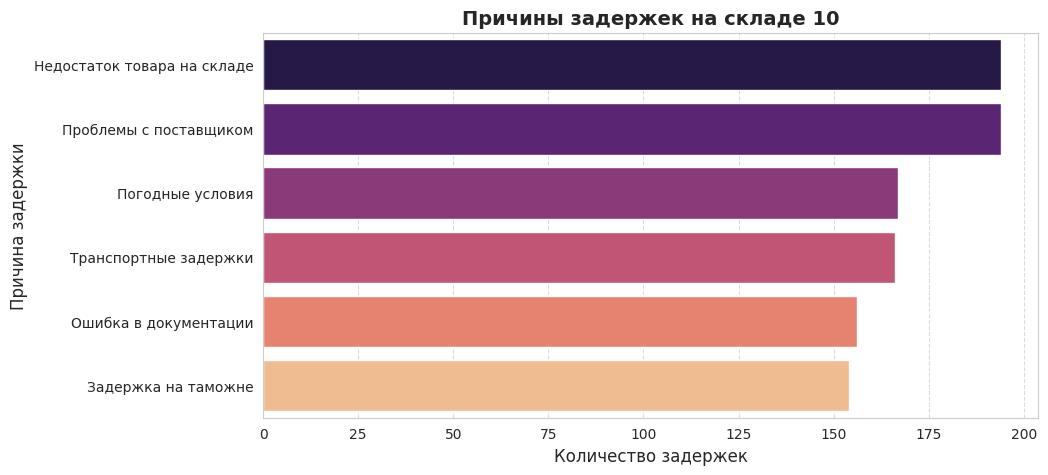

In [26]:
# Фильтруем данные по задержкам и складу "Склад 10"
delayed_reasons = df[(df["Is_Delayed"] == 1) & (df["Warehouse_Name"] == "Склад 10")]

# Подсчет количества задержек по причинам
delay_counts = delayed_reasons["Причина_Задержки"].value_counts().reset_index()
delay_counts.columns = ["Причина_Задержки", "Количество"]

# Настройка графика
plt.figure(figsize=(10, 5))
sns.barplot(data=delay_counts, x="Количество", y="Причина_Задержки", palette="magma")

# Добавляем заголовок и подписи
plt.title("Причины задержек на складе 10", fontsize=14, fontweight="bold")
plt.xlabel("Количество задержек", fontsize=12)
plt.ylabel("Причина задержки", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Отображаем график
plt.show()

## Ответ на вопрос №1: наибольшее количество задержек заказов на **складе №10** в г. Екатеринбурге, а основными причинам их задержек являются - **недостаток товара на складе и проблемы с поставщиком**.

# 2. Какие категории товаров чаще всего поставляются с задержками?

In [27]:
# количество заказов по категориям товаров в отсортированном ввиде
categories = df["Category"].value_counts()
# количество задержек по категориям товаров в отсортированном ввиде
delayed_categories = df[df["Is_Delayed"] == 1]["Category"].value_counts()

In [28]:
# Сделаем таблицу по категориям товаров с общим числом заказов, количеством задержек по ним и % задержек.
df_category_performance = pd.DataFrame({
    "Total Orders": categories,
    "Delayed Orders": delayed_categories,
}).reset_index()

df_category_performance["Delay Rate (%)"] = (df_category_performance["Delayed Orders"] / df_category_performance["Total Orders"]) * 100

# Сортируем категории по убыванию доли задержек
df_category_performance = df_category_performance.sort_values("Delay Rate (%)", ascending=False)

# Выводим результат
df_category_performance

,Category,Total Orders,Delayed Orders,Delay Rate (%)
1,Бытовая техника,10941,2240,20.473448
4,Электроника,22842,4602,20.147097
3,Продукты,20055,3971,19.800548
2,Одежда,22315,4386,19.654941
0,Автозапчасти,23847,4595,19.268671


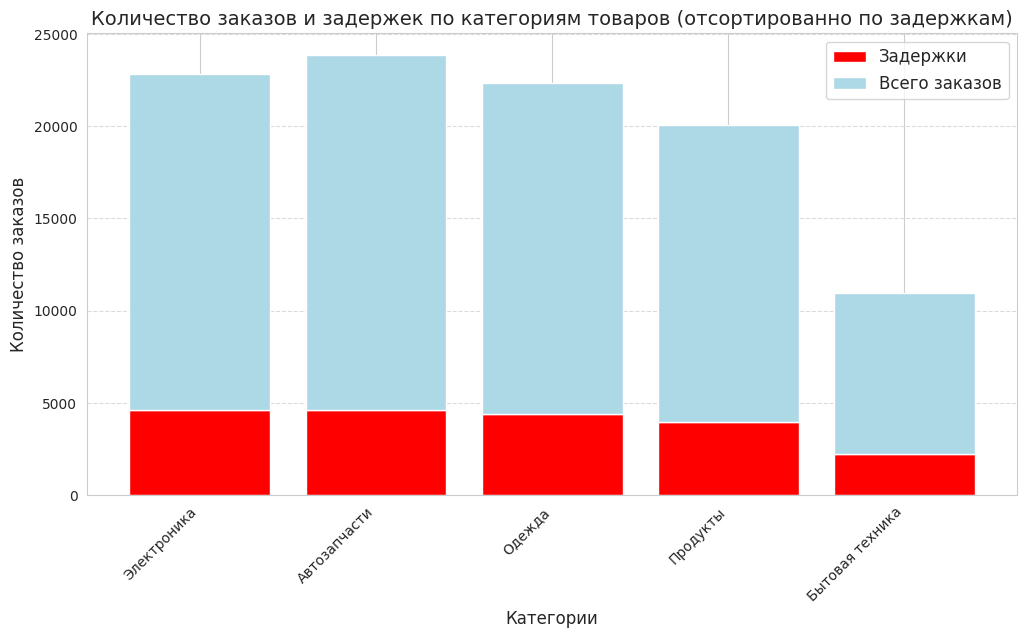

In [29]:
# Объединяем данные для графика
df_plot = pd.DataFrame({"Delayed Orders": delayed_categories, "Total Orders": categories})

# Сортируем категории по общему числу заказов
df_plot = df_plot.sort_values("Delayed Orders", ascending=False)

# Создаем график
plt.figure(figsize=(12, 6))

# Столбцы с задержками (внизу)
plt.bar(df_plot.index, df_plot["Delayed Orders"], color="red", label="Задержки")

# Столбцы с общим числом заказов
plt.bar(df_plot.index, df_plot["Total Orders"] - df_plot["Delayed Orders"],
        bottom=df_plot["Delayed Orders"], color="lightblue", label="Всего заказов")

# Настройки графика
plt.title("Количество заказов и задержек по категориям товаров (отсортированно по задержкам)", fontsize=14)
plt.xlabel("Категории", fontsize=12)
plt.ylabel("Количество заказов", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Отображаем график
plt.show()

<ipython-input-30-3375ac46c334>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-30-3375ac46c334>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


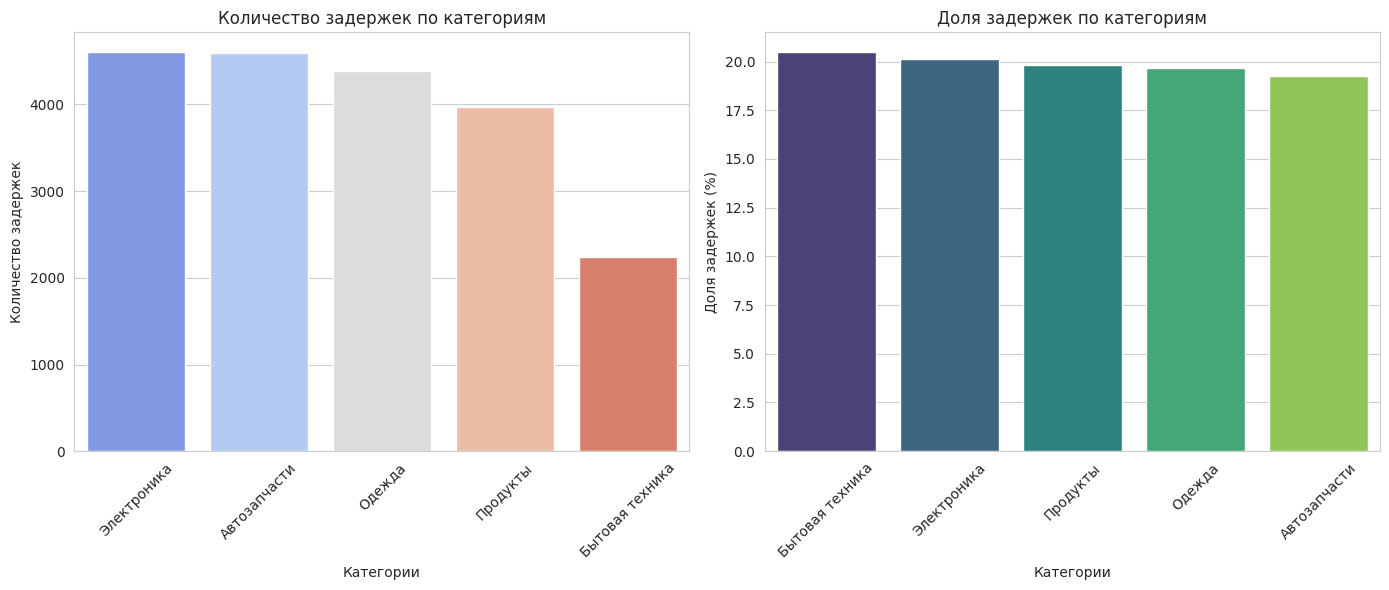

In [30]:
df_sorted_delays = df_category_performance.sort_values("Delay Rate (%)", ascending=False).head()
df_sorted_orders = df_category_performance.sort_values("Delayed Orders", ascending=False).head()

# Создаем фигуру с двумя графиками (1 строка, 2 столбца)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#  Первый график — распределение задержек по категориям
sns.barplot(
    x=df_sorted_orders["Category"],
    y=df_sorted_orders["Delayed Orders"],
    ax=axes[0],  # Указываем первый график (левый)
    palette="coolwarm"
)
axes[0].set_title("Количество задержек по категориям")
axes[0].set_xlabel("Категории")
axes[0].set_ylabel("Количество задержек")
axes[0].tick_params(axis="x", rotation=45)

#  Второй график — общее количество заказов по категориям
sns.barplot(
    x=df_sorted_delays["Category"],
    y=df_sorted_delays["Delay Rate (%)"],
    ax=axes[1],  # Указываем второй график (правый)
    palette="viridis"
)
axes[1].set_title("Доля задержек по категориям")
axes[1].set_xlabel("Категории")
axes[1].set_ylabel("Доля задержек (%)")
axes[1].tick_params(axis="x", rotation=45)

# Улучшаем компоновку
plt.tight_layout()
plt.show()

## Ответ на вопрос №2: наибольшее количество задержек заказов в абсолютном значении соответствует категории товаров ***электроника***, меньше всего задержек ***бытовой техники***. Однако в процентном отношении количество задержек именно ***бытовой техники*** является наибольшим.

# 3. В каких регионах склады работают наиболее эффективно?

В качестве метрики эффективности работы складов в регионах будем использовать метрику доли задержек "Delay Rate (%)" (процент задержанных заказов от общего числа заказов по региону).

In [31]:
# Считаем общее число заказов по регионам
total_orders_by_region = df["Region"].value_counts()
# Считаем общее число заказов с задержками по регионам
delayed_orders_by_region = df[df["Is_Delayed"] == 1]["Region"].value_counts()

In [32]:
# Сделаем таблицу по регионам с их общим числом заказов, количества задержек и % задержек.
df_region_performance = pd.DataFrame({
    "Total Orders": total_orders_by_region,
    "Delayed Orders": delayed_orders_by_region
}).reset_index()

# Рассчитываем процент задержек
df_region_performance["Delay Rate (%)"] = (df_region_performance["Delayed Orders"] / df_region_performance["Total Orders"]) * 100

# Сортируем регионы по возрастанию доли задержек (чем меньше, тем лучше)
df_region_performance = df_region_performance.sort_values("Delay Rate (%)")

# Выводим результат
df_region_performance

,Region,Total Orders,Delayed Orders,Delay Rate (%)
3,Новосибирск,10059,1970,19.584452
0,Москва,35026,6907,19.719637
1,Санкт-Петербург,25154,4964,19.734436
5,Казань,4925,973,19.756345
4,Краснодар,9854,1970,19.991881
2,Екатеринбург,14982,3010,20.090776


<ipython-input-33-ddf7e5507ee7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_region_performance["Region"] , y=df_region_performance["Delay Rate (%)"], palette="magma")


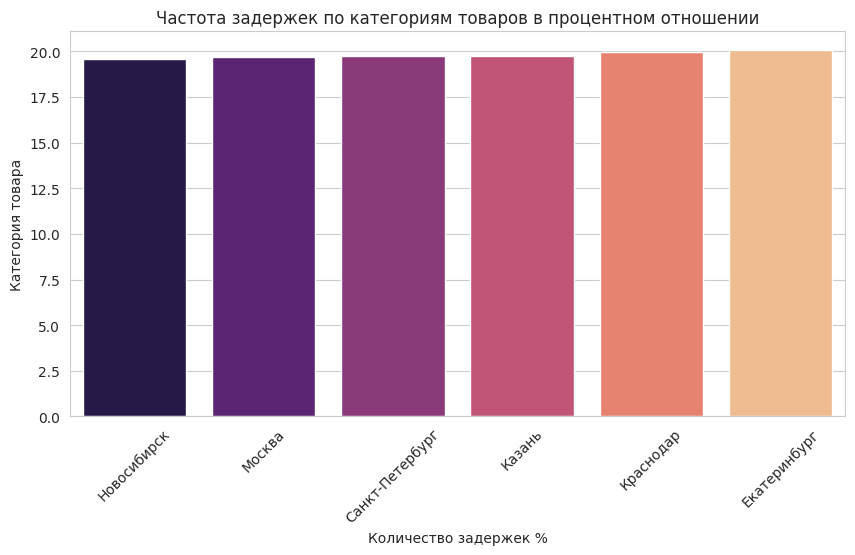

In [33]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df_region_performance["Region"] , y=df_region_performance["Delay Rate (%)"], palette="magma")
plt.title("Частота задержек по категориям товаров в процентном отношении")
plt.xlabel("Количество задержек %")
plt.ylabel("Категория товара")
plt.xticks(rotation=45)
plt.show()

## Ответ на вопрос №3: наиболее эффективно, т.е. с наименьшим % задержек заказов работаю склады **Новосибирска** - **19.58%**.

# 4. Какой поставщик вызывает наибольшие задержки в поставках?

In [34]:
# Считаем общее число заказов по поставщикам
supplier_orders = df["Supplier_Name"].value_counts()
# Считаем число заказов по поставщикам пришедших с запозданием
supplier_delays = df[df["Is_Delayed"] == 1]["Supplier_Name"].value_counts()


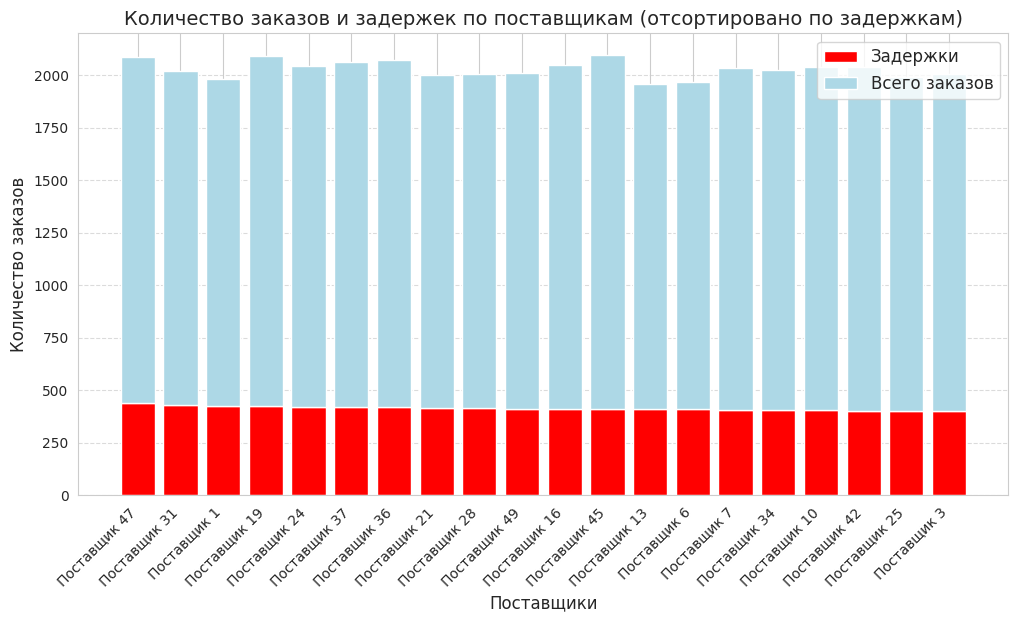

In [35]:
# Объединяем данные для графика
df_plot = pd.DataFrame({"Delayed Orders": supplier_delays, "Total Orders": supplier_orders})

# Сортируем склады по общему числу заказов
df_plot = df_plot.sort_values("Delayed Orders", ascending=False).head(20)

# Создаем график
plt.figure(figsize=(12, 6))

# Столбцы с задержками (внизу)
plt.bar(df_plot.index, df_plot["Delayed Orders"], color="red", label="Задержки")

# Столбцы с общим числом заказов (над задержками)
plt.bar(df_plot.index, df_plot["Total Orders"] - df_plot["Delayed Orders"],
        bottom=df_plot["Delayed Orders"], color="lightblue", label="Всего заказов")

# Настройки графика
plt.title("Количество заказов и задержек по поставщикам (отсортировано по задержкам)", fontsize=14)
plt.xlabel("Поставщики", fontsize=12)
plt.ylabel("Количество заказов", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Отображаем график
plt.show()

In [36]:
# Сделаем таблицу по поставщикам с их общим числом заказов, количества задержек и % задержек. Выведем топ 5 отсортированных по % задержек.
df_supplier_performance = pd.DataFrame({
    "Total Orders": supplier_orders,
    "Delayed Orders": supplier_delays
}).reset_index()

# Рассчитываем процент задержек
df_supplier_performance["Delay Rate (%)"] = (df_supplier_performance["Delayed Orders"] / df_supplier_performance["Total Orders"]) * 100

# Сортируем поставщиков по убыванию доли задержек
df_supplier_performance = df_supplier_performance.sort_values("Delay Rate (%)", ascending=False)

# Выводим результат
df_supplier_performance.head()

,Supplier_Name,Total Orders,Delayed Orders,Delay Rate (%)
0,Поставщик 1,1981,427,21.554770
24,Поставщик 31,2017,429,21.269212
41,Поставщик 47,2087,438,20.987063
4,Поставщик 13,1957,410,20.950434
13,Поставщик 21,1998,416,20.820821


<ipython-input-37-d07ddc11c1a0>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-37-d07ddc11c1a0>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


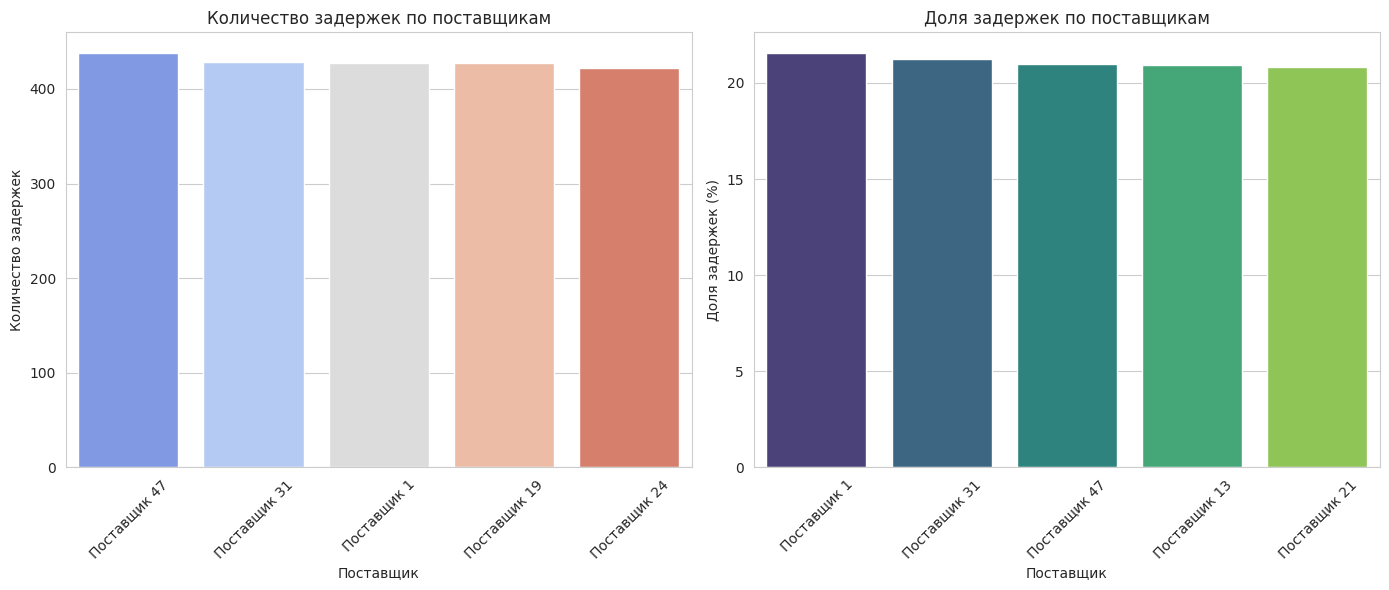

In [37]:
df_sorted_delays = df_supplier_performance.sort_values("Delay Rate (%)", ascending=False).head()
df_sorted_orders = df_supplier_performance.sort_values("Delayed Orders", ascending=False).head()

# Создаем фигуру с двумя графиками (1 строка, 2 столбца)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#  Первый график — распределение задержек по поставщикам
sns.barplot(
    x=df_sorted_orders["Supplier_Name"],
    y=df_sorted_orders["Delayed Orders"],
    ax=axes[0],  # Указываем первый график (левый)
    palette="coolwarm"
)
axes[0].set_title("Количество задержек по поставщикам")
axes[0].set_xlabel("Поставщик")
axes[0].set_ylabel("Количество задержек")
axes[0].tick_params(axis="x", rotation=45)

#  Второй график — общее количество заказов по поставщикам
sns.barplot(
    x=df_sorted_delays["Supplier_Name"],
    y=df_sorted_delays["Delay Rate (%)"],
    ax=axes[1],  # Указываем второй график (правый)
    palette="viridis"
)
axes[1].set_title("Доля задержек по поставщикам")
axes[1].set_xlabel("Поставщик")
axes[1].set_ylabel("Доля задержек (%)")
axes[1].tick_params(axis="x", rotation=45)

# Улучшаем компоновку
plt.tight_layout()
plt.show()

## Ответ на вопрос №4: наибольшее абсолютное количество задержек у **поставщика 47 - 438**, в процентном отношении у **поставщика 1 - 21.55%**.

# 5. Как влияет задержка доставки на оценки клиентов?

In [38]:
# Группируем данные: считаем средний рейтинг для заказов с задержкой и без
df_grouped = df.groupby("Is_Delayed")["Оценка_Доставки"].mean().reset_index()
df_grouped

,Is_Delayed,Оценка_Доставки
0,0,4.500642
1,1,2.118533


<ipython-input-39-c2f96a3d3b5f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_grouped["Is_Delayed"], y=df_grouped["Оценка_Доставки"], palette=["green", "red"])


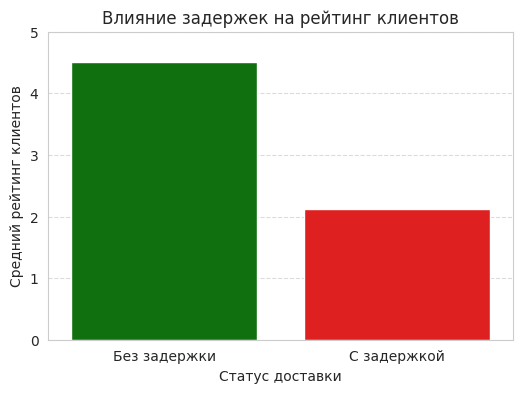

In [39]:
# Отображаем столбчатую диаграмму
plt.figure(figsize=(6, 4))
sns.barplot(x=df_grouped["Is_Delayed"], y=df_grouped["Оценка_Доставки"], palette=["green", "red"])


# Настройки графика
plt.xticks([0, 1], ["Без задержки", "С задержкой"])
plt.ylabel("Средний рейтинг клиентов")
plt.xlabel("Статус доставки")
plt.title("Влияние задержек на рейтинг клиентов")
plt.ylim(0, 5)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

<ipython-input-40-7c5257e2dd11>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Is_Delayed"], y=df["Оценка_Доставки"], palette=["green", "red"])


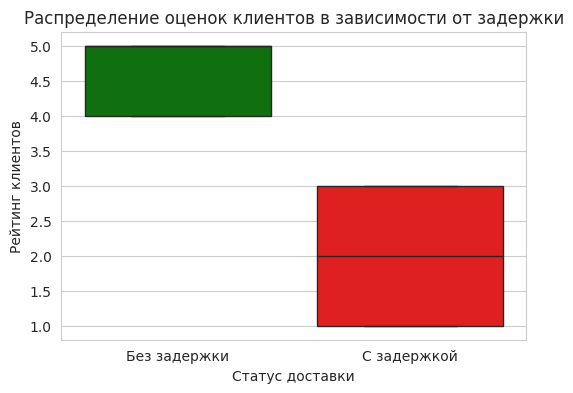

In [40]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Is_Delayed"], y=df["Оценка_Доставки"], palette=["green", "red"])

plt.xticks([0, 1], ["Без задержки", "С задержкой"])
plt.ylabel("Рейтинг клиентов")
plt.xlabel("Статус доставки")
plt.title("Распределение оценок клиентов в зависимости от задержки")

plt.show()

**Уже можно сказать, что значительно влияет в негативную сторону, однако воспользуемя специальными статистическими тестами для проверки корреляции.**

In [41]:
correlation = df["Is_Delayed"].corr(df["Оценка_Доставки"])
print(f"Корреляция между задержкой и оценкой клиента: {correlation:.2f}")

Корреляция между задержкой и оценкой клиента: -0.86


Обнаружена сильная отрицательная связь (чем больше задержек, тем ниже рейтинг).

In [42]:
from scipy.stats import ttest_ind
# удаляем строки с пропущенными значениями оценки
df_clean = df.dropna(subset=["Оценка_Доставки"])
# Разделяем данные
ratings_no_delay = df_clean[df_clean["Is_Delayed"] == 0]["Оценка_Доставки"]
ratings_with_delay = df_clean[df_clean["Is_Delayed"] == 1]["Оценка_Доставки"]
# Выполняем t-тест
t_stat, p_value = ttest_ind(ratings_no_delay, ratings_with_delay, equal_var=False)
print(f"T-статистика: {t_stat:.2f}, p-value: {p_value:.4f}")

T-статистика: 356.21, p-value: 0.0000


T-test показал, что очень сильна разница между оценками клиентов с задержками и без и что эта разница статистически значима, т.к. p-value < 0.05.

## Ответ на вопрос №5: обнаружена корелляция - сильная отрицательная связь (чем больше задержек, тем ниже рейтинг) и подтверждено Т-тестом, что разница в оценках статистически значима.